Author: Martin Loza

Date: 23/12/16

In this workflow I want to explore calculate the z-score normalization of the HiC data. I want to perform the normalization by chromosome.


In [7]:
# Init libraries
import cooler
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

scaler = StandardScaler()

# Global variables
in_dir = "/Volumes/MARTIN_LOZA/Projects/HK_Interactions/Data/HiC/SRA/mcool/"
out_dir = "~/Documents/Projects/HK_Interactions/Analysis/2023_12/2023_12_19/Results/"

# Local functions

def scale_by_group(df, group_column):
    # Obtain the unique values of the group column
    group_values = df[group_column].unique()

    # Create a list to store the scaled matrices
    scaled_matrices = []

    # Loop through each group value
    for value in group_values:
        # Filter the DataFrame by group value
        tmp_data = df[df[group_column] == value].copy()

        # Scale the log10_balanced values
        tmp_data['scaled'] = scaler.fit_transform(tmp_data['log10_balanced'].values.reshape(-1, 1))

        # Append the scaled matrix to the list
        scaled_matrices.append(tmp_data)

    # Concatenate the scaled matrices
    scaled_matrix = pd.concat(scaled_matrices)

    return scaled_matrix

In [10]:

# List of cell types
# cell_types = ['K562']
cell_types = ['GM12878', 'HUVEC', 'IMR90', 'K562', 'KBM7']

# Get available resolutions
# Get tmp mcool file 
# tmp_mcool =h5py.File(in_dir + 'GM12878-HindIII-allReps-filtered.mcool', 'r')

# Get the available resolutions
# resolutions = tmp_mcool['resolutions'].keys()
# Change the resolutions to a vector
# resolutions = [int(res) for res in resolutions]

#test resolution
# resolutions = [1000000]
resolutions = ['10000', '5000']
# resolutions = [ '1000000',  '250000', '2500000', '500000', '5000000']
# resolutions = ['1000', '10000', '100000', '1000000', '2000', '25000', '250000', '2500000', '5000', '50000', '500000', '5000000']

# For each resolution
for resolution in resolutions:

    # List to store scaled matrices
    scaled_matrices = []

    # Loop through each cell type
    for cell_type in cell_types:
       
        # Load the mcool file
        mcool_file = f'{cell_type}-HindIII-allReps-filtered.mcool'
        cool_data = cooler.Cooler(in_dir + mcool_file + "::resolutions/" + str(resolution))
        
        # Load the balanced matrix
        cool_matrix = cool_data.matrix(balance=True, as_pixels=True, join=True)[:]

        # remove inter-chromosomal interactions
        cool_matrix = cool_matrix[cool_matrix['chrom1'] == cool_matrix['chrom2']]

        # Add a column with the cell type
        cool_matrix['cell_type'] = cell_type

        # Calculate the log10 of balanced counts
        cool_matrix['log10_balanced'] = cool_matrix.groupby('chrom1')['balanced'].transform(lambda x: np.log10(x))
        
        # Scale the log10 transformed values by chromosome using scale_by_group function
        scaled_matrix = scale_by_group(cool_matrix, 'chrom1')
        
        # Append the scaled matrix to the list
        scaled_matrices.append(scaled_matrix)

    # Concatenate the scaled matrices
    scaled_matrix = pd.concat(scaled_matrices)

    # Save the scaled matrix
    scaled_matrix.to_csv(out_dir + f'scaled_matrix_{resolution}.csv', index=False)




/var/folders/ny/ghryq2s96nd28p5hz1bzc4240000gn/T/ipykernel_20528/1240011519.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cool_matrix['log10_balanced'] = cool_matrix.groupby('chrom1')['balanced'].transform(lambda x: np.log10(x))
/var/folders/ny/ghryq2s96nd28p5hz1bzc4240000gn/T/ipykernel_20528/1240011519.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cool_matrix['log10_balanced'] = cool_matrix.groupby('chrom1')['balanced'].transform(lambda x: np.log10(x))
/var/folders/ny/ghryq2s96nd28p5hz1bzc4240000gn/T/ipykernel_20528/1240011519.py:43: FutureWarning: The default of observed=False is deprecated an

In [58]:
# Delete previously created objects
del tmp_mcool
del resolutions
del cool_matrix
del mcool_file

In [55]:
scaled_matrix.groupby('cell_type').count()
scaled_matrix[:10]

,chrom1,start1,end1,chrom2,start2,end2,count,balanced,cell_type,log10_balanced,scaled
0,chr1,0,1000000,chr1,0,1000000,16844,0.138459,GM12878,-0.858680,3.507877
1,chr1,0,1000000,chr1,1000000,2000000,3148,0.038244,GM12878,-1.417435,2.531712
2,chr1,0,1000000,chr1,2000000,3000000,332,0.004826,GM12878,-2.316379,0.961228
3,chr1,0,1000000,chr1,3000000,4000000,228,0.002806,GM12878,-2.551865,0.549825
4,chr1,0,1000000,chr1,4000000,5000000,128,0.001592,GM12878,-2.797943,0.119919
5,chr1,0,1000000,chr1,5000000,6000000,128,0.001285,GM12878,-2.891092,-0.042816
6,chr1,0,1000000,chr1,6000000,7000000,186,0.001554,GM12878,-2.808516,0.101447
7,chr1,0,1000000,chr1,7000000,8000000,138,0.001255,GM12878,-2.901225,-0.060519
8,chr1,0,1000000,chr1,8000000,9000000,136,0.001162,GM12878,-2.934724,-0.119042
9,chr1,0,1000000,chr1,9000000,10000000,136,0.001233,GM12878,-2.909154,-0.074371


Code for a single resolution

In [10]:


# List of cell types
# cell_types = ['K562']
cell_types = ['GM12878', 'HUVEC', 'IMR90', 'K562', 'KBM7']

# List to store scaled matrices
scaled_matrices = []

# Resolution
resolution = 1000000

# Loop through each cell type
for cell_type in cell_types:
   
    # Load the mcool file
    mcool_file = f'{cell_type}-HindIII-allReps-filtered.mcool'
    cool_data = cooler.Cooler(in_dir + mcool_file + "::resolutions/" + str(resolution))
    
    # Load the balanced matrix
    cool_matrix = cool_data.matrix(balance=True, as_pixels=True, join=True)[:]

    # remove inter-chromosomal interactions
    cool_matrix = cool_matrix[cool_matrix['chrom1'] == cool_matrix['chrom2']]

    # Add a column with the cell type
    cool_matrix['cell_type'] = cell_type

    # Calculate the log10 of balanced counts
    cool_matrix['log10_balanced'] = cool_matrix.groupby('chrom1')['balanced'].transform(lambda x: np.log10(x))
    
    # Scale the log10 transformed values by chromosome using scale_by_group function
    scaled_matrix = scale_by_group(cool_matrix, 'chrom1')
    
    # Append the scaled matrix to the list
    scaled_matrices.append(scaled_matrix)

# Concatenate the scaled matrices
scaled_matrix = pd.concat(scaled_matrices)


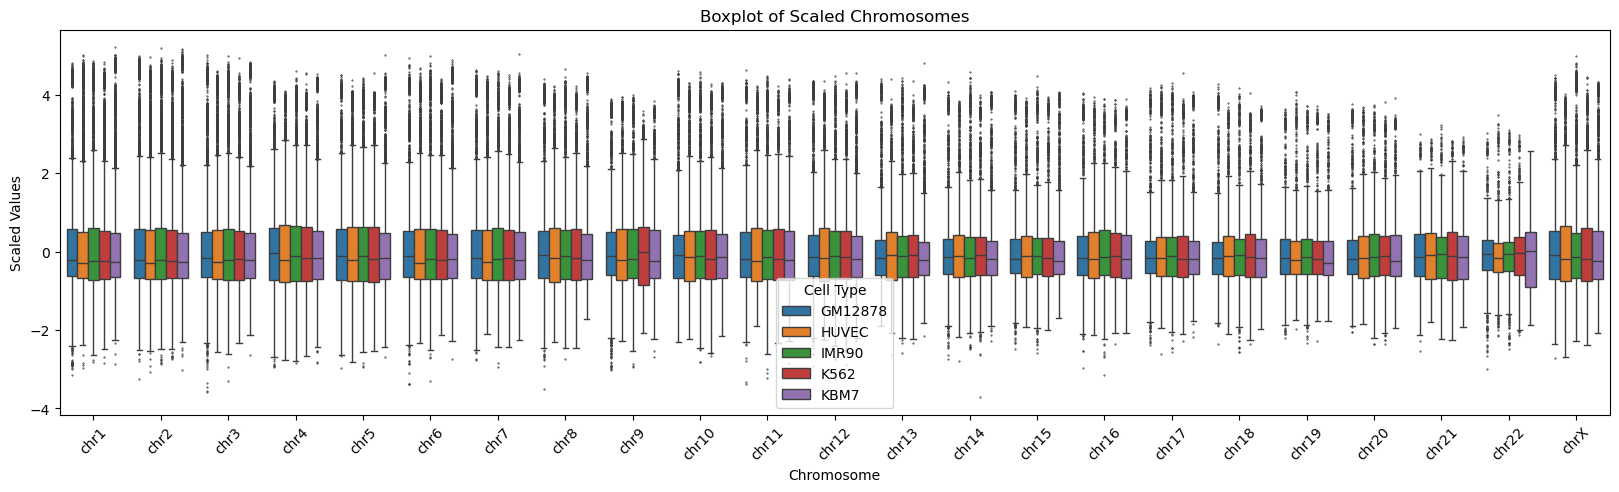

In [21]:

# Reset the index of the scaled_matrix DataFrame
scaled_matrix = scaled_matrix.reset_index(drop=True)

# Plot the boxplots across cells by chromosomes
plt.figure(figsize=(20, 5))
sns.boxplot(data=scaled_matrix, x='chrom1', y='scaled', hue='cell_type', fliersize=0.5 )
plt.title('Boxplot of Scaled Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)
plt.legend(title='Cell Type')
plt.show()


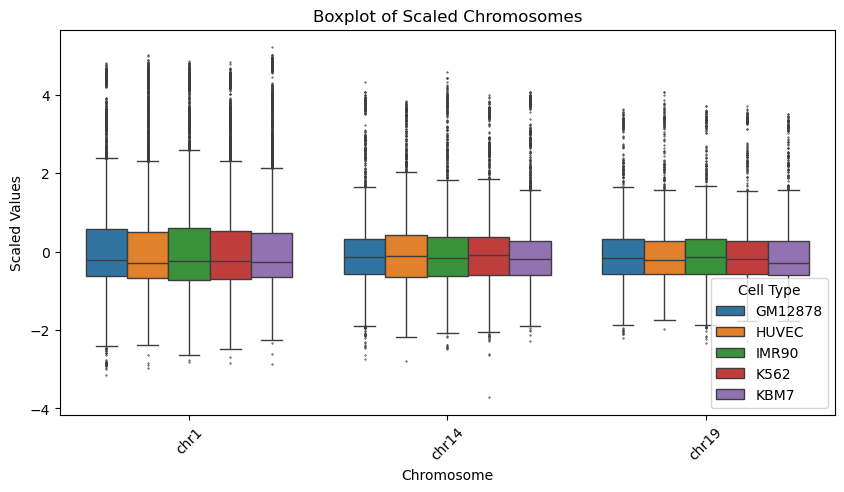

In [36]:
# Plot for selected chromosomes
sel_chrom = ["chr1", "chr14", "chr19"]

# Filter the scaled_matrix DataFrame by selected chromosomes
tmp_df = scaled_matrix[scaled_matrix['chrom1'].isin(sel_chrom)].copy()

# Remove empty categories in chrom1 column
tmp_df['chrom1'] = tmp_df['chrom1'].cat.remove_unused_categories()

# Plot the boxplots across cells by chromosomes
plt.figure(figsize=(10, 5))
sns.boxplot(data=tmp_df, x='chrom1', y='scaled', hue='cell_type', fliersize=0.5 )
plt.title('Boxplot of Scaled Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)

# Add legend and show plot
plt.legend(title='Cell Type')
plt.show()


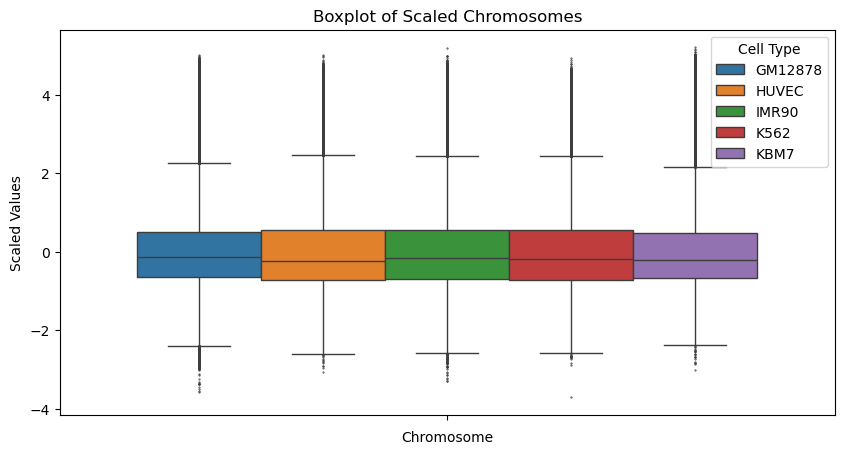

In [39]:
# Balanced count by celltypes
# Plot the boxplots across cells 
plt.figure(figsize=(10, 5))
sns.boxplot(data=scaled_matrix,y='scaled', hue='cell_type', fliersize=0.5 )
plt.title('Boxplot of Scaled Chromosomes')
plt.xlabel('All scaled counts')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)
plt.legend(title='Cell Type')
plt.show()


In [41]:
#Save the scaled matrix
scaled_matrix.to_csv(out_dir + "scaled_matrix.csv", index=False)
